# Load Essential Python Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Load Training/ Test Dataset

In [32]:
train = pd.read_csv('E:/Machine Learning/train.csv')
test = pd.read_csv('E:/Machine Learning/test.csv')

# About the dataset 

In [33]:
#Size of Train Data
train.shape

(614, 13)

So we have 614 rows and 13 columns in our training dataset.

In [34]:
#Size of Test Data
test.shape

(367, 12)

In test data, we have 367 rows and 12 columns because the target column is not included in the test data.

In [36]:
#Information about train Dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [38]:
# First look at the Dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Categorical Columns: 
1. Gender (Male/Female), 
2. Married (Yes/No), 
3. Number of dependents (Possible values:0,1,2,3+), 
4. Education (Graduate / Not Graduate), 
5. Self-Employed (No/Yes), 
6. credit history(Yes/No), 
7. Property Area (Rural/Semi-Urban/Urban) and 
8. Loan Status (Y/N)(i. e. Target variable)

Numerical Columns: 
1. Loan ID, 
2. Applicant Income, 
3. Co-applicant Income, 
4. Loan Amount, and 
5. Loan amount term

# Data Preprocessing

In [39]:
# Concatenating the train and test data for data preprocessing:
data = pd.concat([train,test])

In [40]:
# Dropping the unwanted column:
data.drop('Loan_ID', inplace=True, axis='columns')

In [41]:
# Identify missing values:
data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [42]:
# Imputing the missing values:
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

In [43]:
# Next, we will be using Iterative imputer for filling missing values of LoanAmount and Loan_Amount_Term
data1 = data.loc[:,['LoanAmount','Loan_Amount_Term']]

from sklearn.ensemble import RandomForestRegressor
#Running the imputer with a Random Forest Estimator
imp = IterativeImputer(RandomForestRegressor(), max_iter=1000, random_state=0)
data1 = pd.DataFrame(imp.fit_transform(data1), columns=data1.columns)

data['LoanAmount'] = data1['LoanAmount']
data['Loan_Amount_Term'] = data1['Loan_Amount_Term']

In [44]:
# So now as we have imputed all the missing values we go on to mapping the categorical variables with the integers.
data['Gender'] = data['Gender'].map({'Male':0,'Female':1}).astype(int)
data['Married'] = data['Married'].map({'No':0,'Yes':1}).astype(int)
data['Education'] = data['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
data['Self_Employed'] = data['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
data['Credit_History'] = data['Credit_History'].astype(int)    

In [45]:
data['Property_Area'] = data['Property_Area'].map({'Urban':0,'Rural':1, 'Semiurban':2}).astype(int)
data['Dependents'] = data['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

We map the values so that we can input the train data into the model as the model does not accept any string values.

In [46]:
#creating a new feature
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis='columns', inplace=True)

# Exploratory Data Analysis (EDA) 

In [47]:
# Splitting the data to new_train and new_test so that we can perform EDA.
new_train = data.iloc[:614]
new_test = data.iloc[614:]

In [48]:
# Mapping ‘N’ to 0 and ‘Y’ to 1
new_train['Loan_Status'] = new_train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

<Axes: xlabel='Dependents', ylabel='count'>

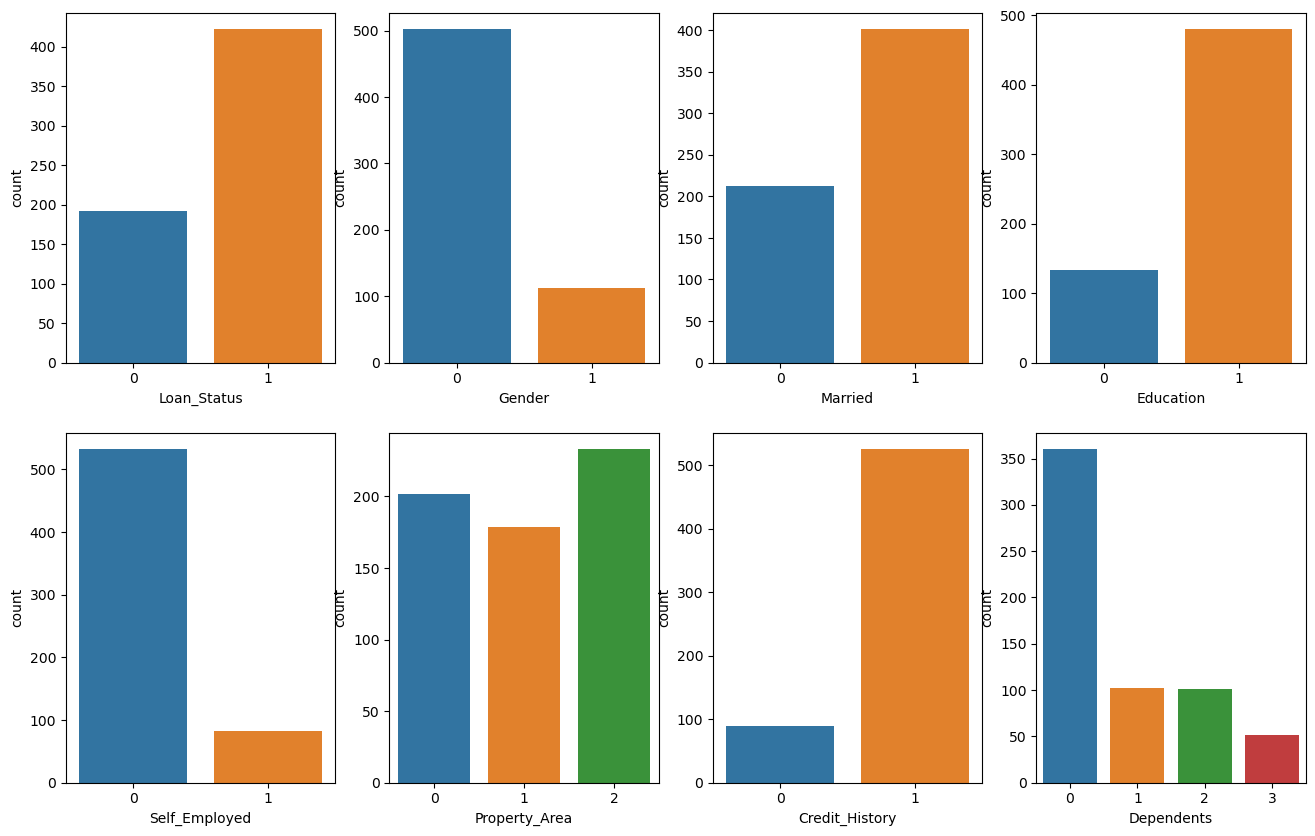

In [49]:
# Univariate Analysis:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x='Loan_Status', data = new_train, ax=ax[0][0])
sns.countplot(x='Gender', data = new_train, ax=ax[0][1])
sns.countplot(x='Married', data = new_train, ax=ax[0][2])
sns.countplot(x='Education', data = new_train, ax=ax[0][3])
sns.countplot(x='Self_Employed', data = new_train, ax=ax[1][0])
sns.countplot(x='Property_Area', data = new_train, ax=ax[1][1])
sns.countplot(x='Credit_History', data = new_train, ax=ax[1][2])
sns.countplot(x='Dependents', data = new_train, ax=ax[1][3])

Univariate Analysis Observations:

1. More Loans are approved Vs Rejected
2. Count of Male applicants is more than Female
3. Count of Married applicant is more than Non-married
4. Count of graduate is more than non-Graduate
5. Count of self-employed is less than that of Non-Self-employed
6. Maximum properties are located in Semiurban areas
7. Credit History is present for many applicants
8. The count of applicants with several dependents=0 is maximum.

<Axes: xlabel='Loan_Status', ylabel='Total_Income'>

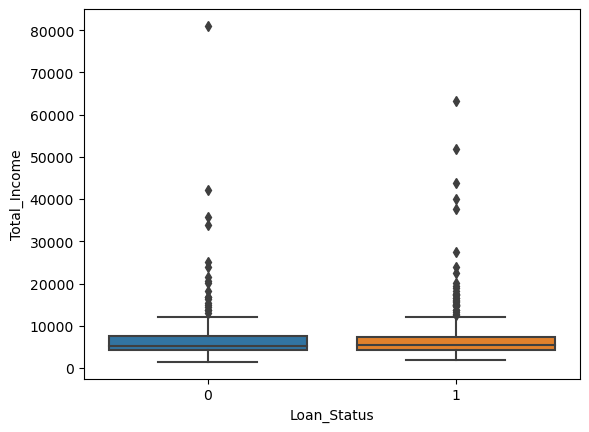

In [50]:
# Bivariate Analysis
sns.boxplot(x='Loan_Status', y='Total_Income', data=new_train)

Mean Total_Income of 0 and 1 are almost the same (o: no,1: Yes)

<Axes: xlabel='Gender', ylabel='LoanAmount'>

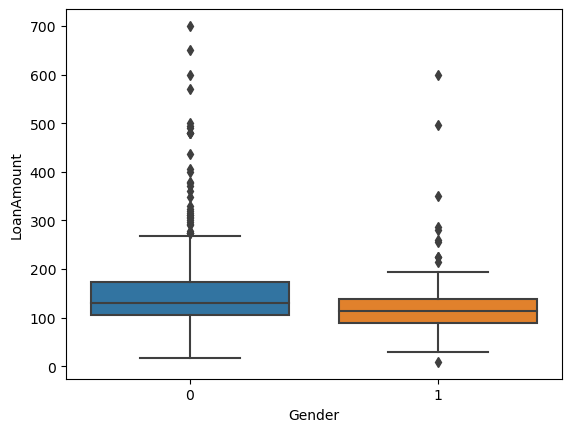

In [51]:
sns.boxplot(x='Gender', y='LoanAmount', data=new_train)

The mean value of Loan Amount applied by males (0) is slightly higher than Females(1).

<Axes: >

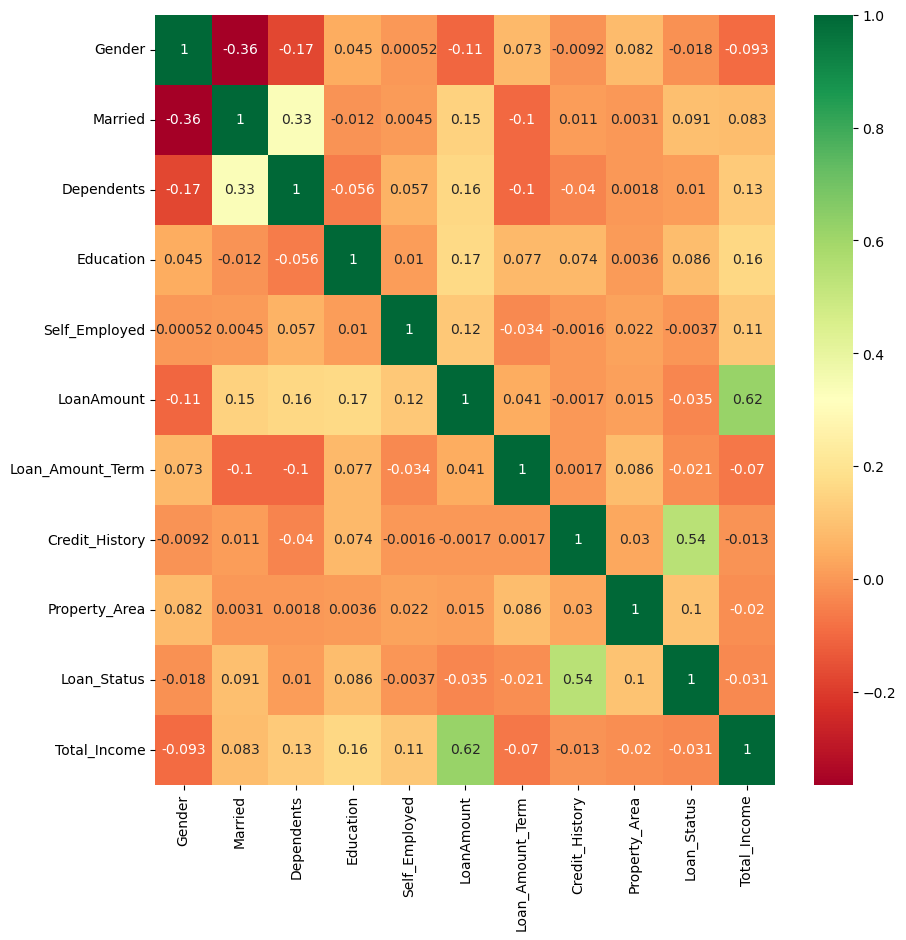

In [52]:
# Correlation matrix
plt.figure(figsize = (10,10))
correlation_matrix = new_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')

# Building Machine Learning Model

In [53]:
# Creating X (input variables) and Y (Target Variable) from the new_train data.
x = new_train.drop('Loan_Status', axis='columns')
y = new_train['Loan_Status']

In [54]:
# Using train test split on the training data for validation
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=3)

In [55]:
X_train['Target']=y_train
X_test['Target']=y_test
X_train.to_csv('E:/Machine Learning/70_30/train.csv')
X_test.to_csv('E:/Machine Learning/70_30/test.csv')

In [56]:
X_train.shape

(429, 11)

In [57]:
X_test.shape

(185, 11)

In [58]:
import time
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

train = pd.read_csv('E:/Machine Learning/70_30/train.csv')
test = pd.read_csv('E:/Machine Learning/70_30/test.csv')

X_Train = train.drop('Target', axis='columns')
Y_Train = train['Target']

X_Test = test.drop('Target', axis='columns')
Y_Test = test['Target']



# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),  # Probability is needed for AUC calculation
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Train and test data
# Assume X_train, y_train, X_test, y_test are predefined

# Initialize dataframe to store results
results = []

# Loop through classifiers, fit, and get metrics
for name, clf in classifiers.items():
    # Track time
    start_train = time.time()
    clf.fit(X_Train, Y_Train)
    train_time = time.time() - start_train
    
    start_test = time.time()
    y_pred = clf.predict(X_Test)
    test_time = time.time() - start_test
    
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(Y_Test, y_pred).ravel()
    
    # Metrics
    accuracy = accuracy_score(Y_Test, y_pred)
    precision = precision_score(Y_Test, y_pred)
    recall = recall_score(Y_Test, y_pred)
    f1 = f1_score(Y_Test, y_pred)
    tpr = tp / (tp + fn)  # Sensitivity, Recall
    fnr = fn / (tp + fn)
    tnr = tn / (tn + fp)  # Specificity
    fpr = fp / (tn + fp)
    
    # ROC AUC
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_Test)[:, 1]
    else:
        y_score = clf.decision_function(X_Test)
    
    auc_roc = roc_auc_score(Y_Test, y_score)
    
    # Store results
    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "TP": tp,
        "FN": fn,
        "TN": tn,
        "FP": fp,
        "TPR": tpr,
        "FNR": fnr,
        "TNR": tnr,
        "FPR": fpr,
        "Training Time": train_time,
        "Testing Time": test_time,
        "AUC-ROC": auc_roc
    })

# Convert results to DataFrame for display
results_df = pd.DataFrame(results)
results_df

,Classifier,Accuracy,Precision,Recall,F1 Score,TP,FN,TN,FP,TPR,FNR,TNR,FPR,Training Time,Testing Time,AUC-ROC
0,Random Forest,0.843243,0.862745,0.942857,0.901024,132,8,24,21,0.942857,0.057143,0.533333,0.466667,0.456589,0.029703,0.811825
1,AdaBoost,0.827027,0.860000,0.921429,0.889655,129,11,24,21,0.921429,0.078571,0.533333,0.466667,0.110328,0.000000,0.834048
2,XGBoost,0.794595,0.859155,0.871429,0.865248,122,18,25,20,0.871429,0.128571,0.555556,0.444444,0.172090,0.031243,0.800159
3,Gradient Boosting,0.816216,0.858108,0.907143,0.881944,127,13,24,21,0.907143,0.092857,0.533333,0.466667,0.285262,0.008045,0.790635
4,Naive Bayes,0.843243,0.849057,0.964286,0.903010,135,5,21,24,0.964286,0.035714,0.466667,0.533333,0.000000,0.000000,0.809048
5,SVM,0.745946,0.754098,0.985714,0.854489,138,2,0,45,0.985714,0.014286,0.000000,1.000000,0.046862,0.000000,0.412698
6,Decision Tree,0.751351,0.867188,0.792857,0.828358,111,29,28,17,0.792857,0.207143,0.622222,0.377778,0.015610,0.000000,0.707540
7,Logistic Regression,0.837838,0.848101,0.957143,0.899329,134,6,21,24,0.957143,0.042857,0.466667,0.533333,0.031479,0.000000,0.811587


In [59]:
results_df

,Classifier,Accuracy,Precision,Recall,F1 Score,TP,FN,TN,FP,TPR,FNR,TNR,FPR,Training Time,Testing Time,AUC-ROC
0,Random Forest,0.843243,0.862745,0.942857,0.901024,132,8,24,21,0.942857,0.057143,0.533333,0.466667,0.456589,0.029703,0.811825
1,AdaBoost,0.827027,0.860000,0.921429,0.889655,129,11,24,21,0.921429,0.078571,0.533333,0.466667,0.110328,0.000000,0.834048
2,XGBoost,0.794595,0.859155,0.871429,0.865248,122,18,25,20,0.871429,0.128571,0.555556,0.444444,0.172090,0.031243,0.800159
3,Gradient Boosting,0.816216,0.858108,0.907143,0.881944,127,13,24,21,0.907143,0.092857,0.533333,0.466667,0.285262,0.008045,0.790635
4,Naive Bayes,0.843243,0.849057,0.964286,0.903010,135,5,21,24,0.964286,0.035714,0.466667,0.533333,0.000000,0.000000,0.809048
5,SVM,0.745946,0.754098,0.985714,0.854489,138,2,0,45,0.985714,0.014286,0.000000,1.000000,0.046862,0.000000,0.412698
6,Decision Tree,0.751351,0.867188,0.792857,0.828358,111,29,28,17,0.792857,0.207143,0.622222,0.377778,0.015610,0.000000,0.707540
7,Logistic Regression,0.837838,0.848101,0.957143,0.899329,134,6,21,24,0.957143,0.042857,0.466667,0.533333,0.031479,0.000000,0.811587


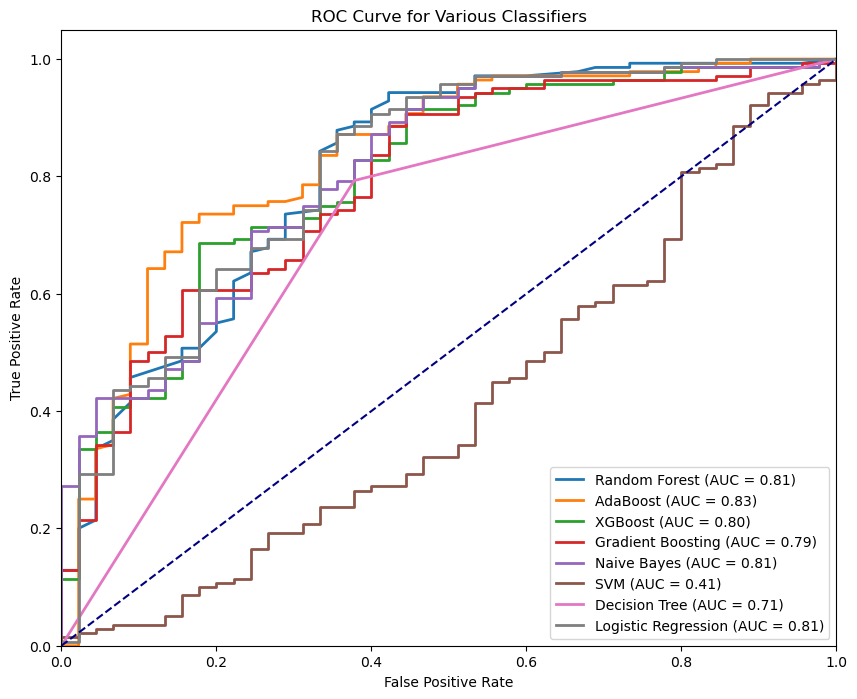

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC curve
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_Test)[:, 1]
    else:
        y_score = clf.decision_function(X_Test)
    
    fpr, tpr, _ = roc_curve(Y_Test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Various Classifiers')
plt.legend(loc="lower right")
plt.show()